##### Module 4- Example Plots of Weather Data
author: Radley Rigonan
    
In this module, I we will be using data from RadWatch's AirMonitor to create a plot that compares counts per second (CPS) due to Bismuth-214 against the CPS of the lesser occurring isotope Cesium-137. I will be using the following link:
https://radwatch.berkeley.edu/sites/default/files/pictures/rooftop_tmp/weather.csv

The first step in creating a plot is being aware of the format of your CSV file.  This weather.csv is organized 9 columns.  The 1st column contains important timestamp information, the 2nd column contains Bi-234 CPS, and the 5th column contains Cs-137 CPS.  Therefore, we must extract the data from these columns:

In [1]:
%matplotlib inline
import csv
import io
import urllib.request            
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # another matplotlib convention; this extension facilitates dates as axes labels.
from datetime import datetime      # we will use the datetime extension so we can group the timestamp data into manageable units of year, month, date, and time.

url = 'https://radwatch.berkeley.edu/sites/default/files/pictures/rooftop_tmp/weather.csv' 
response = urllib.request.urlopen(url)
reader = csv.reader(io.TextIOWrapper(response)) 
timedata = []
Bi214 = []
Cs137 = []
line = 0

for row in reader:
    if line != 0:
        timedata.append(datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S'))
            #datetime.strptime is a class object that facilitates usage of date/time data in Python
        Bi214.append(float(row[1]))
        Cs137.append(float(row[4]))
    line += 1

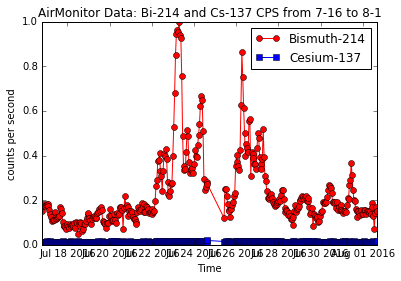

In [2]:
def weather_plot1():
    fig, ax = plt.subplots()      # matplotlib convention that unpacks figures into variables for ax (axis manipulation) and fig (figure manipulation)
        # compact commands for: fig = plt.figure()
        # AND: fig.add_subplot(1,1,1)
    ax.plot(timedata, Bi214, 'ro-', label="Bismuth-214")
    ax.plot(timedata, Cs137, 'bs-', label="Cesium-137")
    plt.title('AirMonitor Data: Bi-214 and Cs-137 CPS from %s-%s to %s-%s'
              %(timedata[0].month, timedata[0].day, timedata[-1].month, timedata[-1].day))
        # string interpolation (represented by %s):  The '%s' are replaced by the strings given in %(-,-,-,-) in the 2nd line
    plt.xlabel('Time')
    plt.ylabel('counts per second')
    plt.legend(loc='best')          # loc=best places the legend where it will obstruct the data the least.

weather_plot1()

There are a few problems with this current plot.  Notably, the x-ticks are overlapping and it is difficult to examine the Cesium-137 data because it is so small.  Regarding the x-ticks, the labels can be made more visible by rotating the tick-labels.  In addition, the Cesium data can be made more visible with a logarithmic plot:

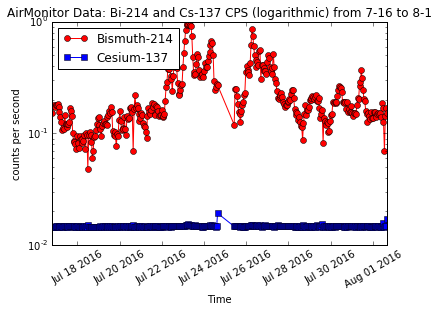

In [3]:
def weather_plot2():
    weather_plot1()
    # adjustments
    plt.xticks(rotation=30)
    plt.yscale('log')
    plt.title('AirMonitor Data: Bi-214 and Cs-137 CPS (logarithmic) from %s-%s to %s-%s' 
              %(timedata[0].month, timedata[0].day, timedata[-1].month, timedata[-1].day))
    plt.show()

weather_plot2()

While these plots are fine, many professionally-made graphics are thoroughly controlled and every aspect of the plot is kept in mind.  The following example is a more comprehensive approach to plotting.  Also, this example will calculate error and include error bars in the final plot.  The final plot is similar to the plot in the AirMonitor website: radwatch.berkeley.edu/airsampling

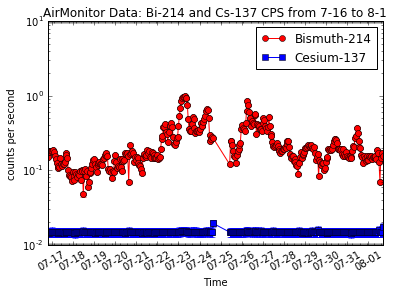

In [4]:
def weather_plot3():
    
    import numpy as np 
        # the next module explains numpy in more detail, but numpy is used here to perform a square-root operation for error.
    
    # 1st step: plot the data
    fig, ax = plt.subplots()
    ax.plot(timedata, Bi214, 'ro-', label='Bismuth-214')
    ax.errorbar(timedata, Bi214, yerr=np.sqrt(Bi214)/60, fmt='ro', ecolor='r')
    ax.plot(timedata, Cs137, 'bs-', label='Cesium-137')
    ax.errorbar(timedata, Cs137, yerr=np.sqrt(Cs137)/60, fmt='bs', ecolor='b')
        # error is given by np.sqrt(Bi214)/60 and is based on the conversion from hourly countrate to counts-per-second
        # for ax.errorbar, fmt=format and is identical to corresponding plot for coherence
                         # ecolor=line color and is identical to corresponding plot for same reason.

    # 2nd step: legend and axis manipulations:    
    plt.legend(loc='best')
    plt.yscale('log')      # you can decide if this plot is better/worse in log scale
    
    # 3rd step: format ticks along axis; we will use matplotlib's built-in datetime commands to format the axis:
    ax.xaxis.set_major_locator(mdates.DayLocator())
        # ticks on x-axis day-by-day basis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        # tick labels only occur on days in the format: Month-Day
        # you can customize the format, i.e. '%m-%d-%Y %H:00' would be Month-Day-Year Hour:00
    ax.xaxis.set_minor_locator(mdates.HourLocator())
        # minor ticks on x-axis occur on hour marks
    plt.xticks(rotation=30)

    # 4th step: titles and labels
    plt.title('AirMonitor Data: Bi-214 and Cs-137 CPS from %s-%s to %s-%s' 
              %(timedata[0].month, timedata[0].day, timedata[-1].month, timedata[-1].day))
    plt.xlabel('Time')
    plt.ylabel('counts per second')
    
weather_plot3()